# Introduction

This Project explores the Ford GoBike System Data, a dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

# Data Cleaning

### The following will be done to achieve a tidey dataset needed for his analysis:

 - There are some variables I would not be needing for this analysis and they include the longitude and latitudes columns, I will drop these columns.
 - Most of the columns datatypes are not accurate, I will fix these
 - The missing values in the dataset cannot be fixed using any of the columns in the dataset, so I will drop thes
 - I will create some additional columns that will aid this analysis

In [4]:
# drop the longitude and latitude columns
df.drop(columns = ['start_station_longitude', 'start_station_latitude',
                   'end_station_longitude','end_station_latitude'], inplace = True)

In [5]:
# drop the missing values
df.dropna(inplace = True)

In [6]:
# convert the start_time and end_time to a datetime object
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [7]:
# lets write a function that takes a column of the dataset and change it to a specified datatype
def datatype_converter(data,column, datatype):
    """ this changes the datatype of the column to the specified datatype"""
    data[column] = data[column].astype(datatype)
    return data[column]

In [8]:
# checking our function on the bike_id column
datatype_converter(df,'bike_id', str)
df.bike_id.dtype

dtype('O')

start_station_id and end_station_id are floats and have decimal points, so when fixing the columns, the satatype is first of all converted to integers before converting them to strings

In [9]:
# fixing the columns datatype
datatype_converter(df,'start_station_id',int)
datatype_converter(df,'end_station_id',int)
datatype_converter(df,'member_birth_year',int)
datatype_converter(df,'start_station_id',str)
datatype_converter(df,'end_station_id',str)
datatype_converter(df,'user_type','category')
datatype_converter(df,'member_gender','category')
datatype_converter(df,'bike_share_for_all_trip','category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  int32         
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(3), 

let's create some additional columns to aid this analysis

In [10]:
# columns creation
df['start_weekday'] = df['start_time'].dt.strftime('%a')
df['hour'] = df['start_time'].dt.hour.astype(str)
df['member_age'] = 2022 - df['member_birth_year']

In [11]:
# convert start_month, start_weekday and hour to a categorical variable
df['start_weekday'] = pd.Categorical(df['start_weekday'], categories = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ordered = True)

df['hour'] = pd.Categorical(df['hour'], categories = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'], ordered = True)

In [13]:
print(df.start_weekday.head())
print(df.member_age.head())

0    Thu
2    Thu
3    Thu
4    Thu
5    Thu
Name: start_weekday, dtype: category
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun']
0    38
2    50
3    33
4    48
5    63
Name: member_age, dtype: int32


In [12]:
# drop member_birth_year column
df.drop(columns = 'member_birth_year', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_gender            174952 non-null  category      
 10  bike_share_for_all_trip  174952 non-null  category      
 11  start_weekday            174952 non-null  category      
 12  hour            

In [13]:
# creating the trip duration in seconds
df['duration_mins'] = df['duration_sec']/60

In [14]:
# lets see what our numerical variables looks like
df.select_dtypes('number').describe()

,duration_sec,member_age,duration_mins
count,174952.000000,174952.000000,174952.000000
mean,704.002744,37.196865,11.733379
std,1642.204905,10.118731,27.370082
min,61.000000,21.000000,1.016667
25%,323.000000,30.000000,5.383333
50%,510.000000,35.000000,8.500000
75%,789.000000,42.000000,13.150000
max,84548.000000,144.000000,1409.133333


### What is the structure of your dataset?
After gathering and cleaning this dataset, it contains 174,952 bike trips with 15 columns, most of which are categorical variables

### What is/are the main feature(s) of interest in your dataset?

I am most interested in Trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Almost all the categorical variable will play a part in this Visualisation

## Univariate  Exploration
let's take a look at the duration in seconds

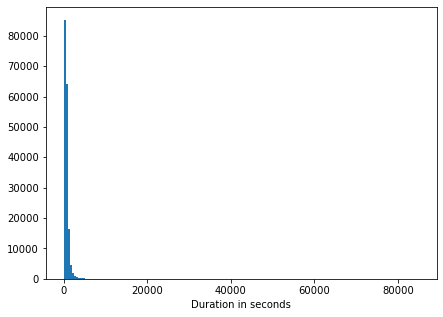

In [74]:
# plot the duration_sec distribution
plt.figure(figsize = [7,5])
binsize = 500
bin_edge = np.arange(0, df['duration_sec'].max() + binsize, binsize)
plt.hist(df['duration_sec'],bins = bin_edge)
plt.xlabel('Duration in seconds');


The above plots the distribution of duration in seconds, and it is highly skewed to the right, we will repeat this plot in a logarithmic scale

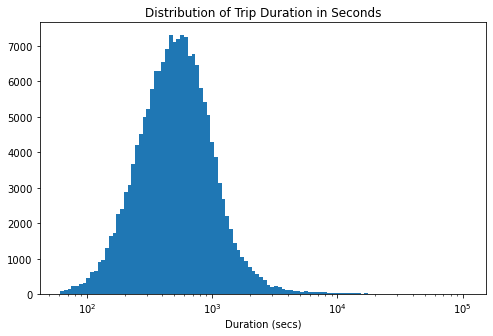

In [108]:
binsize = 0.03
bins = 10**np.arange(1.785, 5+binsize, binsize)
plt.figure(figsize = [8,5])
plt.hist(df['duration_sec'], bins = bins)
plt.xscale('log')
plt.xlabel('Duration (secs)')
plt.title('Distribution of Trip Duration in Seconds');


plt.savefig('duration1.png')

Putting our plot in logarithmic scale, it's unimodal, still right skewed with most of the observations less than 10,000.
lets, replicate this same plot but choosing 10,000 seconds to be our upper bounds

In [132]:
df.duration_mins.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_mins, dtype: float64

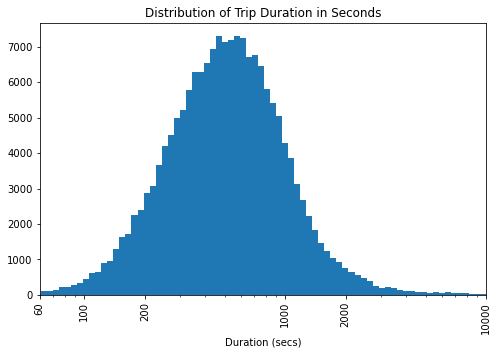

In [133]:
# making 10,000 our upper bound
binsize = 0.03
bins = 10**np.arange(1.785, 5+binsize, binsize)
plt.figure(figsize = [8,5])
plt.hist(df['duration_sec'], bins = bins)
plt.xscale('log')
plt.xlabel('Duration (secs)')
plt.title('Distribution of Trip Duration in Seconds')
plt.xlim([60,10000])
ticks = [60,100, 200, 1000,2000,10000]
labels = ['{}'.format(a) for a in ticks]
plt.xticks(ticks,labels,rotation = 90)
plt.savefig('duration2.png')

We can see from above plot that most of the duration in seconds of trips in our data set falls between 200 and 1000 seconds but to make thi a little bit clear, lets make a distribution plot of durations in minutes

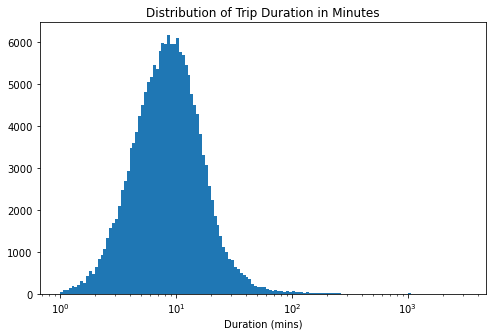

In [134]:
# plotting the distribution of duration in minutes
binsize = 0.025
bins = 10**np.arange(0, 3.5 + binsize, binsize)
plt.figure(figsize = [8,5])
plt.hist(df['duration_mins'], bins = bins)
plt.xscale('log')
plt.xlabel('Duration (mins)')
plt.title('Distribution of Trip Duration in Minutes');


Lets clean this plot a little bit and make 100 minutes our upper bound

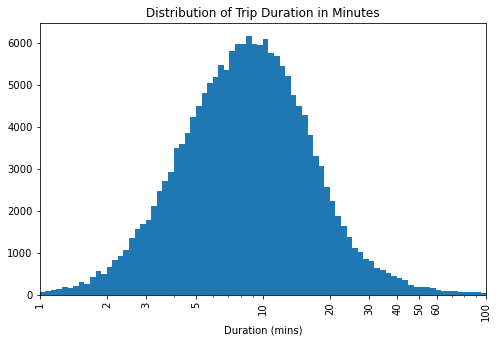

In [135]:
# making 100 mins our upper bound
binsize = 0.025
bins = 10**np.arange(0, 3.5 + binsize, binsize)
plt.figure(figsize = [8,5])
plt.hist(df['duration_mins'], bins = bins)
plt.xscale('log')
plt.xlabel('Duration (mins)')
plt.title('Distribution of Trip Duration in Minutes');
plt.xlim([1,100])
ticks = [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 100]
labels = ['{}'.format(a) for a in ticks]
plt.xticks(ticks,labels,rotation = 90)
plt.savefig('duration_mins.png');

Now this is better, our plot is unimodal and most of the trips duration falls between 4 and 20 minutes.

Now that we have seen how long most of our rides take, Lets Explore the member age variable

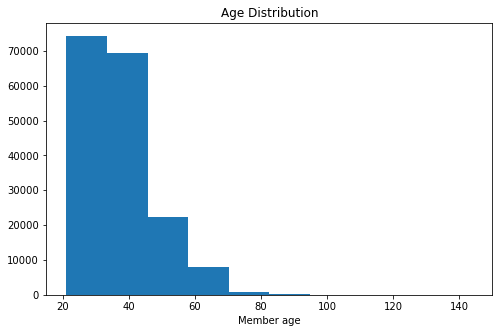

In [177]:
plt.figure(figsize = [8,5])
plt.hist(df.member_age)
plt.xlabel('Member age')
plt.title('Age Distribution');

The Age Distribution in our dataset is right skewed, mostly because of the outliers, let's make our upper bound to be 80

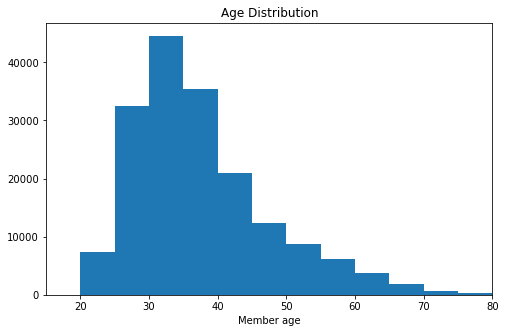

In [190]:
binsize = 5
bin_edges = np.arange(20, df.member_age.max() + binsize, binsize)
plt.figure(figsize = [8,5])
plt.hist(df.member_age, bins = bin_edges)
plt.xlim([15,80])
plt.xlabel('Member age')
plt.title('Age Distribution');

plt.savefig('age1_distribution.png')

The member_age distribution shows that most of the riders in our dataset ar between the age 25 and 50

Now Lets take a look at the Categorical variables starting from hour

### At what hour of the day and at what day of the week are most rides taken?

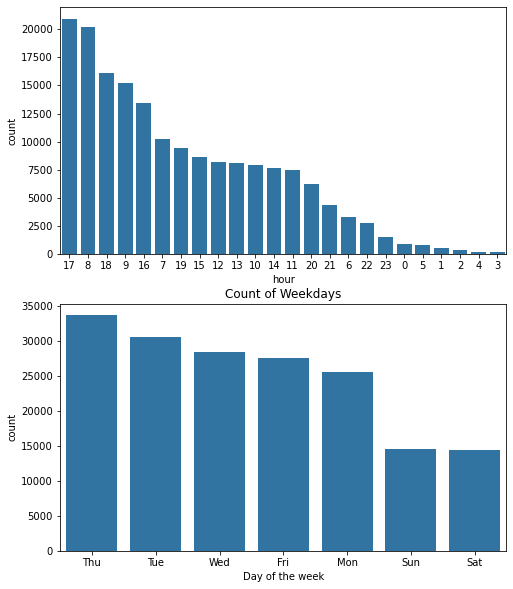

In [19]:
# creating a bar chart of hour
fig, ax = plt.subplots(nrows = 2,figsize = [8,10])

base_color = sns.color_palette()[0]
hour_order = df['hour'].value_counts().index
sns.countplot(data = df, x = 'hour', color = base_color, order = hour_order, ax=ax[0])
plt.title('Count of hours')
plt.xlabel('Hour(s)')

# creating a countplot for the weeday)
color = sns.color_palette()[0]
order = df['start_weekday'].value_counts().index
sns.countplot(data = df, x = 'start_weekday', color = color, order = order, ax=ax[1])
plt.title('Count of Weekdays')
plt.xlabel('Day of the week');

plt.savefig('hourandweekday.png')

From the avove plots, the 17th hour is the time when most bikers take their trip, also, most bikers take their trip during weekdays than weekends.

Okay. Let's also have a look at the most popular bike in our datasel, also the most popular start and end stations in our dataset, we will just take a look at first 20 of these

In [284]:
# calculate the popular bikes, start_stations, end_stations
top_20_bikes = df.bike_id.value_counts().head(20)
print(top_20_bikes)

top_20_start_station = df.start_station_name.value_counts(normalize = True).head(20)
print(top_20_start_station)

top_20_end_station = df.end_station_name.value_counts(normalize = True).head(20)
print(top_20_end_station)

4794    179
4814    172
5175    167
4450    166
5145    165
5482    164
4422    163
4956    162
4812    162
4834    162
4773    161
5048    160
5274    159
5014    157
5325    157
5351    156
4767    156
4653    156
4742    154
5034    154
Name: bike_id, dtype: int64
Market St at 10th St                                               0.020857
San Francisco Caltrain Station 2  (Townsend St at 4th St)          0.019480
Berry St at 4th St                                                 0.016873
Montgomery St BART Station (Market St at 2nd St)                   0.015496
Powell St BART Station (Market St at 4th St)                       0.014976
San Francisco Caltrain (Townsend St at 4th St)                     0.014730
San Francisco Ferry Building (Harry Bridges Plaza)                 0.014524
Howard St at Beale St                                              0.012666
Steuart St at Market St                                            0.012523
Powell St BART Station (Market St at 5th St)    

We want to represent the popular bikes, start and end stations in a bar chart and get an idea of their proportions

In [255]:
n_trip = df.shape[0]
most_popular_bike = top_20_bikes[0]
max_prop = most_popular_bike/n_trip
max_prop*100

0.10231377749325529

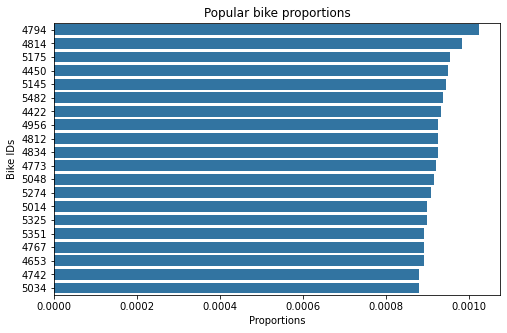

In [254]:
# creating the plot for the most popular bike
ticks = np.arange(0, max_prop , 0.0002)
tick_labels = ['{:.4f}'.format(v) for v in ticks]
bike_order = top_20_bikes.index

plt.figure(figsize = [8,5])
sns.countplot(y = 'bike_id', data = df, color = base_color, order = bike_order)
plt.xticks(ticks*n_trip, tick_labels)
plt.xlabel('Proportions')
plt.ylabel('Bike IDs')
plt.title('Popular bike proportions');

plt.savefig('popular.png')

from the above plot, the bike with the id 4794 is the most popular bike, it also suffixes to say that it is the most used bike.

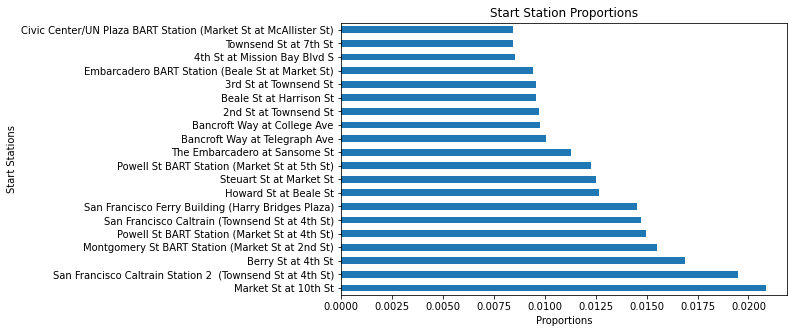

In [286]:
# creating the plot for the most popular start station
plt.figure(figsize = [8,5])
top_20_start_station.plot(kind ='barh')

plt.xlabel('Proportions')
plt.ylabel('Start Stations')
plt.title('Start Station Proportions');

# saving the figure
plt.savefig('popular_s1.png')

This plot shows that most of our bike users start their trips from Market St at 10th

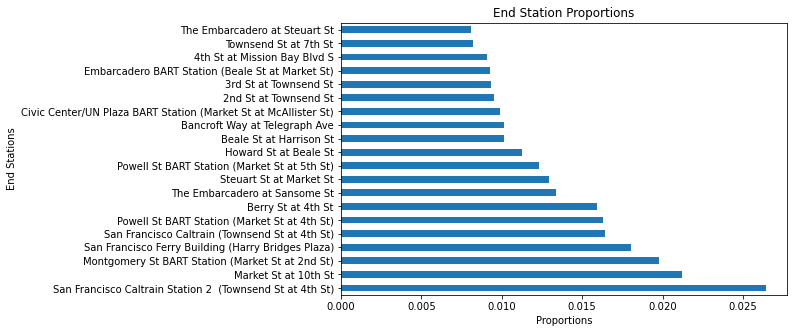

In [287]:
# create a proportions plots for the most popular end stations
plt.figure(figsize = [8,5])
top_20_end_station.plot(kind ='barh')

plt.xlabel('Proportions')
plt.ylabel('End Stations')
plt.title('End Station Proportions');

# saving the figure
plt.savefig('popular_e.png')

The deduction we can make from this plot is that firstly, the bike with the Id 4794 is the most used bike, secondly,most trips in our dataset starts from market St at 10th and ends at San Fransico Caltran Station 2.

for the last univariate exploration, we will be exploring the proportion of gender, user_type and bike_share_for_all_trip in our data set. Firstly, we will get the proprtion of these variables and then relay the information in a plot

In [308]:
# getting their proportions
gender = df.member_gender.value_counts(normalize = True)
gender_order = gender.index
user =df.user_type.value_counts(normalize = True)
user_order = user.index
bike_share = df.bike_share_for_all_trip.value_counts(normalize = True)
bike_order = bike_share.index
print(gender)
print(user)
print(bike_share)

Male      0.745919
Female    0.233235
Other     0.020846
Name: member_gender, dtype: float64
Subscriber    0.905311
Customer      0.094689
Name: user_type, dtype: float64
No     0.900853
Yes    0.099147
Name: bike_share_for_all_trip, dtype: float64


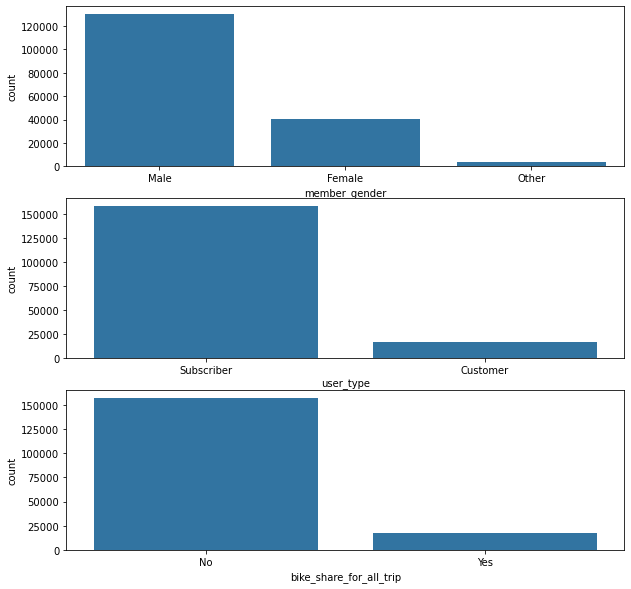

In [297]:
# creating the figure
plt.figure(figsize = [10,10])

# subplot 1 for gender
plt.subplot(3,1,1)
sns.countplot(data = df, x = 'member_gender', color = base_color, order = gender_order)

# subplot 2 for user type
plt.subplot(3,1,2)
sns.countplot(data = df, x = 'user_type', color = base_color, order = user_order)

# subplot 3 for bike_share_for_all_trip
plt.subplot(3,1,3)
sns.countplot(data = df, x = 'bike_share_for_all_trip', color = base_color, order = bike_order);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Analysing the feature, duration in seconds showed an extremely skewed dataset,this suggested a vry big outlier and further investigation showed that the minimum duration in seconds was 61seconds and the maximum duration in seconds was 84548 seconds. To make the plot of the distribution more illuminating, this feature was plotted on a logariyhmic scale and the lower bound and upper bound set to 60seconds and 10,000 seconds respectively. The feature presented a fairly normally distributed dataset, sligtly skewed to the right, it looks unimodat with a lot of trip's duration in seconds falling between 200 and 1000 seconds.

To make this feature easier to understand, duration in minutes was also plotted to get a better view of the time, the plot looks roughly the same, the only difference being that the time is now represented in minutes for clarity.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The age distribution in our dataset is skewed to the right and have an outlier, 144years of age, 75% of our observations are under 42years of age, to make the data more illuminating, the binsize and edges were adjusted and this presented a peak between the ages 30 and 35, although a large chunk of our observation falls between the ages of 25 and 45.

After plotting the hours of the week to get an idea of what hour of the day most trips are taken, the chart showed that most trips are taken in the morning and in the evening mostly at 8am and 5pm respectively, also, more trips are made during the weekday than the weekends, this might suggest that customers or subscribers use the bike share as a means of transportation to their various work places.

Analysing the gender, user type and whether or not these users subscribed for the bike_share_for_all, the following were discovered;
 - 75% of riders are male compared to 23% female bike riders
 - 91% of the riders are subscribers and 9% are customers
 - only 10% of riders subscribed for the bike_share_for_all and 90% did not

## Bivariate Exploration
firstly, we will have a look at the user_type, memeber_gender and bike_share_for_all and the duration of rides in seconds

In [391]:
# let's define our numeric and categorical variables
num_var = ['member_age','duration_mins']
cat_var = ['member_gender','user_type','bike_share_for_all_trip']

C:\Users\chikaodili\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


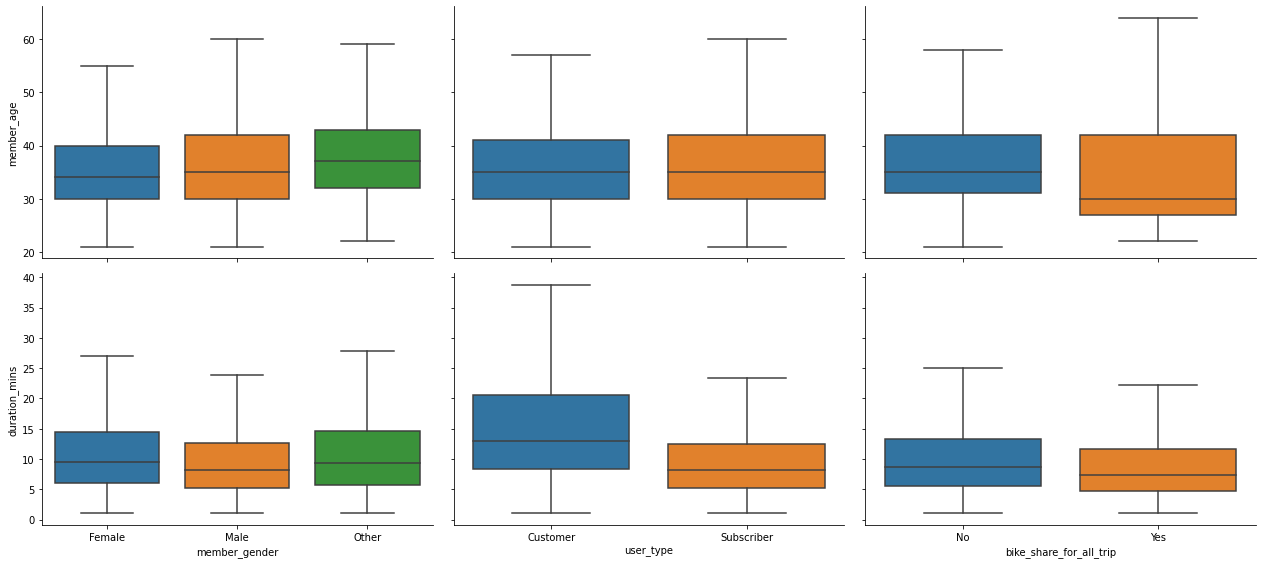

In [392]:
b = sns.PairGrid(data = df, x_vars = cat_var,y_vars = num_var, size = 4, aspect = 1.5, diag_sharey =False)
b.map(sns.boxplot, sym="");

#### Ride Duration

__User type__: customers generally takes longer rides than subscribers
__Member gender__: females and others seems to have equal distribution of ride durations while the male gender generally take a shorter rides when compared to the three genders
__Bike Share For All__: the plot shows that those that didn't subscribe for bike_share_for_all generally takes a longer ride.

#### Age distribution
__User type__: the customers and subscribers seems to be in similar age group, although the subscribers age distribution varies a little bit more than the customer's
__member gender__:the plot shows that the females are of younger age while those recognised as 'other' are older
__bike share for all trip__: We can also see from this plot that those who pariticipated in the bike share for all program are of younger age group.

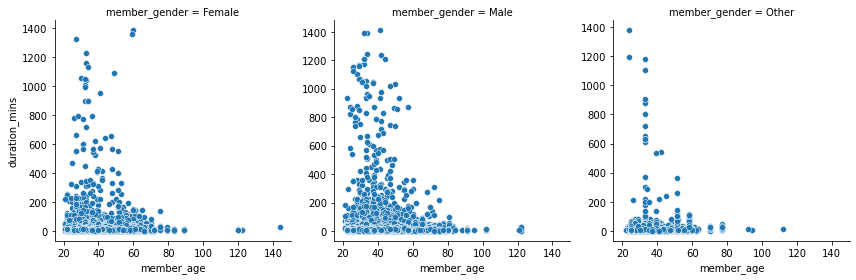

In [408]:
# let's explore age and ride duration among the three different member genders in our data set
g = sns.FacetGrid(data = df, col = 'member_gender', height = 4, aspect = 1, sharey = False)
g.map(sns.scatterplot, 'member_age', 'duration_mins');

this plot shows that most oservations in our dataset with long rides are under 50 years of age

C:\Users\chikaodili\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 576x576 with 0 Axes>

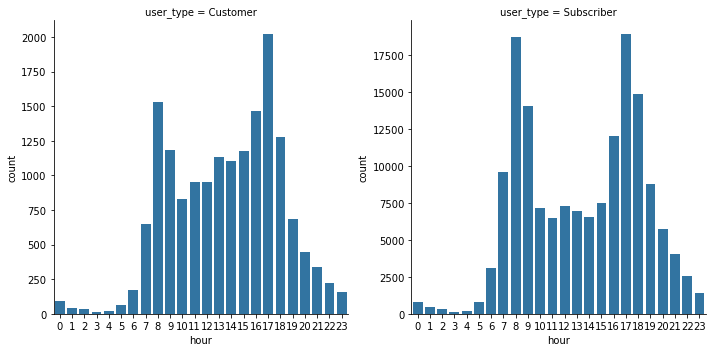

In [352]:
plt.figure(figsize = [8,8])
g = sns.FacetGrid(data = df, col = 'user_type', height = 5, aspect = 1, sharey =False)
g.map(sns.countplot, 'hour');

from this plot, we could see that even if customer's rides tends to be the longest, subscribers have the most rides. Also, this plot tells us that both the customers and subscribers share the same pattern when it comes to the hour of the day when most rides are taken, we can see that in the two groups most rides are taken in the morning and in the evening.
In the plot below, we are going to look at the correlation coefficient between our numeric variables, member_age and duration_sec.

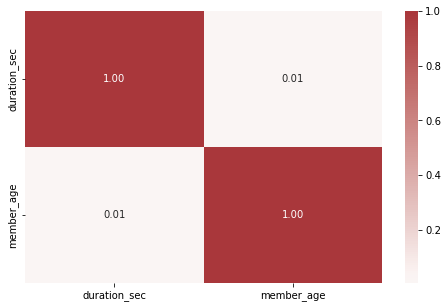

In [354]:
# correlation heatmap
plt.figure(figsize = [8,5])
sns.heatmap(df[['duration_sec','member_age']].corr(), annot = True, fmt = '.2f', cmap = 'vlag', center = 0);

we can see that the correlation between duration in seconds and the age of members is almost zero.
we are going to create a matrix to show how duration in seconds varies between hour of the day and day of the week

In [363]:
# creating the matrix
df_crosstab = pd.crosstab(df['hour'], df['start_weekday'], values =df['duration_sec'], aggfunc = 'mean').round(0)
df_crosstab

start_weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour,,,,,,,
0,746.0,1604.0,616.0,1062.0,670.0,651.0,685.0
1,918.0,622.0,639.0,613.0,704.0,637.0,557.0
2,844.0,482.0,1631.0,2493.0,703.0,1461.0,666.0
3,1173.0,537.0,1639.0,2401.0,581.0,848.0,2635.0
4,717.0,430.0,665.0,562.0,812.0,725.0,960.0
5,546.0,666.0,532.0,571.0,592.0,790.0,834.0
6,553.0,534.0,506.0,505.0,533.0,703.0,776.0
7,617.0,578.0,583.0,595.0,605.0,989.0,1298.0
8,659.0,641.0,635.0,668.0,658.0,630.0,911.0


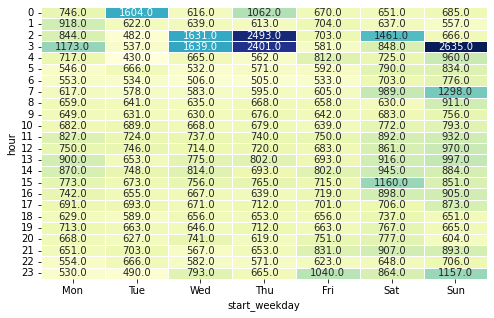

In [368]:
# creating the heatmap
plt.figure(figsize = [8,5])
sns.heatmap(df_crosstab, annot = True, linewidths = .5, cmap = 'YlGnBu', fmt ='.1f', cbar = False);

it looks like most long rides happen around 3am on sunday, 2am and 3am on thursday

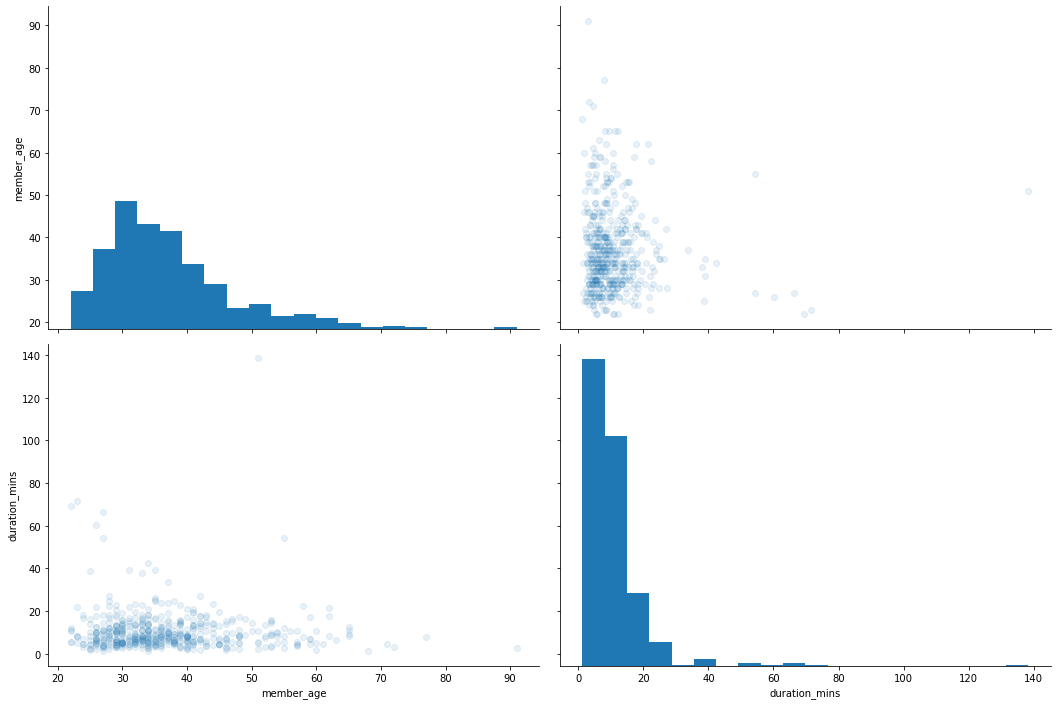

In [17]:
# plot a matrix of the numeric variable: sample 500 observations so that plots are clearer and they render faster
df_samp = df.sample(n= 500, replace = False)
a = sns.PairGrid(data = df_samp, vars = ['member_age','duration_mins'], height = 5, aspect = 1.5)
a = a.map_diag(plt.hist, bins = 20)
a.map_offdiag(plt.scatter, alpha = .1);

just like the correlation heatmap suggested above, there is no visible relationship between the member age and duration in our dataset, also, most of the rides are under 50mins.lets have an idea of trip duration during weekdays and each hour

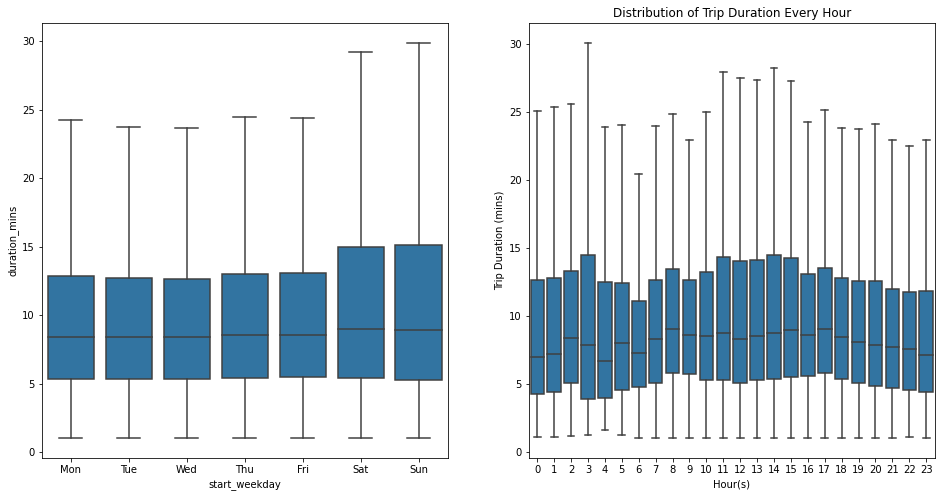

In [20]:
# for weekdays
fig, ax = plt.subplots(ncols = 2, figsize =[16,8])
sns.boxplot(data = df, x = 'start_weekday', y = 'duration_mins', color = base_color, sym ="", ax = ax[0])
plt.xlabel('Weekdays')
plt.ylabel('Trip Duration (mins)')
plt.title('Distribution of Trip Duration Every Weekday')

# for each hour
sns.boxplot(data = df, x = 'hour', y = 'duration_mins', color = base_color, sym = "", ax = ax[1])
plt.xlabel('Hour(s)')
plt.ylabel('Trip Duration (mins)')
plt.title('Distribution of Trip Duration Every Hour');

During the weekdays, the duration of rides shows a similar pattern, this suggests that subscribers and customers use the rides to and from their various workplaces, the plot of duration against each hour also supports this claim, remeber we found out that most rides were taken in the morning by 8am and evening by 17pm, looking at our plot, these times shows a simliar pattern in duration and this shows that most rider uses this ride to their workplaces and back.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this section, we observed that in most cases, customers take the longest rides, however, subscribers in most cases takes the most rides. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Trip duration and member age shows no correlation. During the weekdays, the duration of rides shows a similar pattern, this suggests that subscribers and customers use the rides to and from their various workplaces, the plot of duration against each hour also supports this claim, remeber we found out that most rides were taken in the morning by 8am and evening by 17pm, looking at our plot, these times shows a simliar pattern in duration and this shows that most rider uses this ride to their workplaces and back.

### Multivariate Exploration

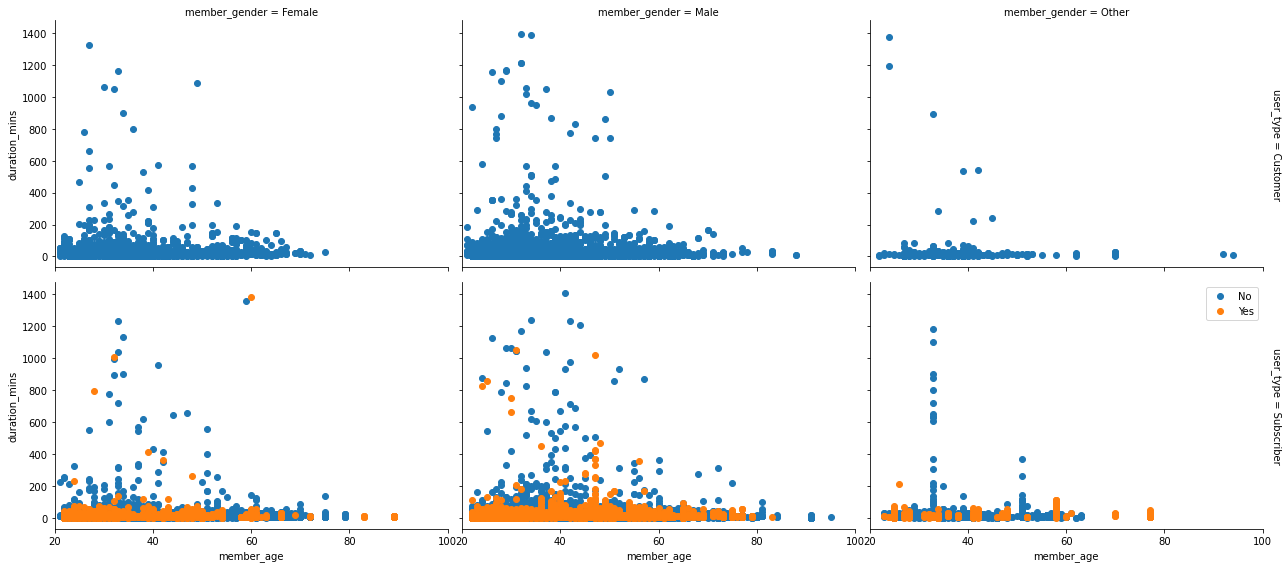

In [459]:
x = sns.FacetGrid(data = df, col = 'member_gender', row = 'user_type', hue = 'bike_share_for_all_trip', margin_titles =True, height = 4, aspect = 1.5)
x.map(plt.scatter, 'member_age','duration_mins')
plt.xlim([20,100])
plt.xticks([20,40,60,80,100])
plt.legend();

when ride duaration is plotted against age for each gender and each user type, it can be seen that same pattern is maintained.

For the rest of multivariate visualisation, we will groupby the whole categorical variables and take the mean duration in minutes and then represent them in our plots 

In [22]:
# grouping by categorical variables
df_grouped = df.groupby(['member_gender','user_type','bike_share_for_all_trip','start_weekday'], as_index =False)['duration_mins'].mean()
df_grouped

,member_gender,user_type,bike_share_for_all_trip,start_weekday,duration_mins
0,Female,Customer,No,Mon,24.465214
1,Female,Customer,No,Tue,20.451142
2,Female,Customer,No,Wed,23.292107
3,Female,Customer,No,Thu,20.294565
4,Female,Customer,No,Fri,21.386191
...,...,...,...,...,...
79,Other,Subscriber,Yes,Wed,12.282155
80,Other,Subscriber,Yes,Thu,14.096517
81,Other,Subscriber,Yes,Fri,15.840755
82,Other,Subscriber,Yes,Sat,10.671154


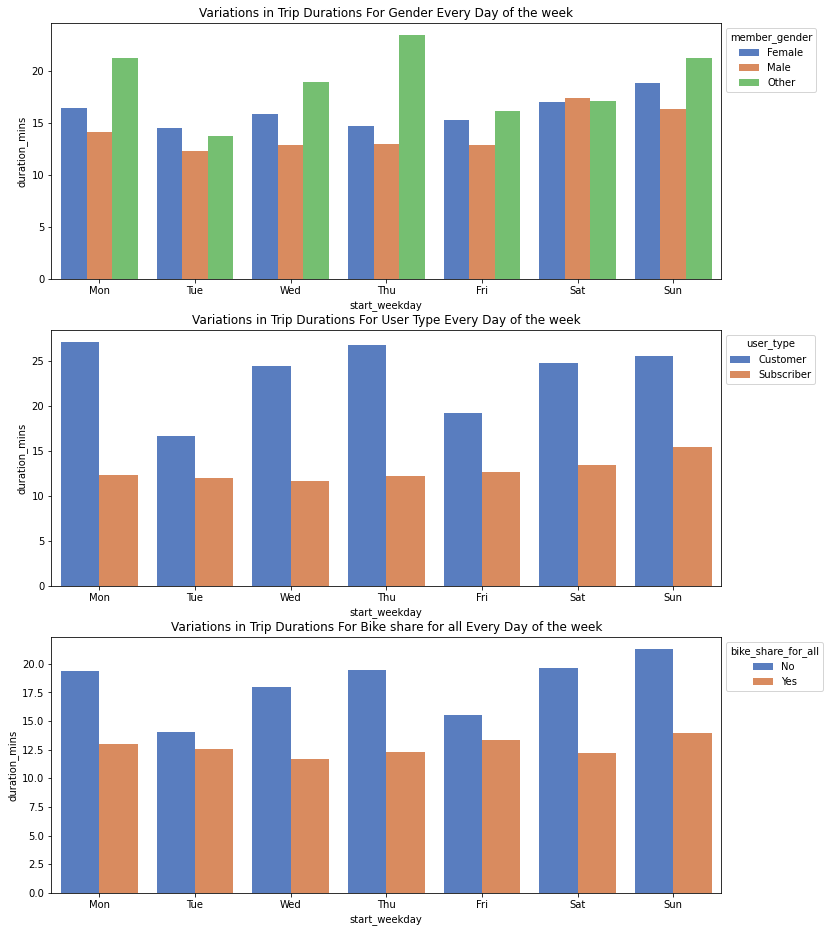

In [28]:
# setting the figure
# for gender
fig,ax = plt.subplots(nrows = 3, figsize =[12,16])
sns.barplot(data = df_grouped, x ='start_weekday', y = 'duration_mins',
               hue = 'member_gender', ci = None,palette = 'muted', ax = ax[0])
ax[0].legend(loc ='upper left', bbox_to_anchor = (1,1), title = 'member_gender')
ax[0].set_title('Variations in Trip Durations For Gender Every Day of the week')

# for user type
sns.barplot(data = df_grouped, x ='start_weekday', y = 'duration_mins',
               hue = 'user_type', ci = None, palette = 'muted', ax = ax[1])
ax[1].legend(loc ='upper left', bbox_to_anchor = (1,1), title = 'user_type')
ax[1].set_title('Variations in Trip Durations For User Type Every Day of the week')
# for bike_share_for all
sns.barplot(data = df_grouped, x ='start_weekday', y = 'duration_mins',
               hue = 'bike_share_for_all_trip', ci = None, palette = 'muted', ax = ax[2])
ax[2].legend(loc ='upper left', bbox_to_anchor = (1,1), title = 'bike_share_for_all')
ax[2].set_title('Variations in Trip Durations For Bike share for all Every Day of the week');

for the majority of days in the week, the 'other' gender takes the longest rides, the rest of the plots firther supports what has been established in previous plots.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The first plot of trip duration against gender for each user type category  coloring the plot with the bike_share_for_all_trip suggests a similar pattern for duration and age for the two user types, customer and subscribers, also it turns out that those who subscribed for the bike share for all trip program.

### Were there any interesting or surprising interactions between features?
For the better part of the week, the gender 'other' get the longest rides, the rest supports what we have seen in bivariate visualisations, customers get the longest rides and those who didn't subscribe for the trip duration get the longest rides, and this might suggest that customers are the same as those who didn't subscribe for the bike share for all program.